In [ ]:
import cv2 as c
import cv2
import matplotlib.pyplot as p

import numpy as n

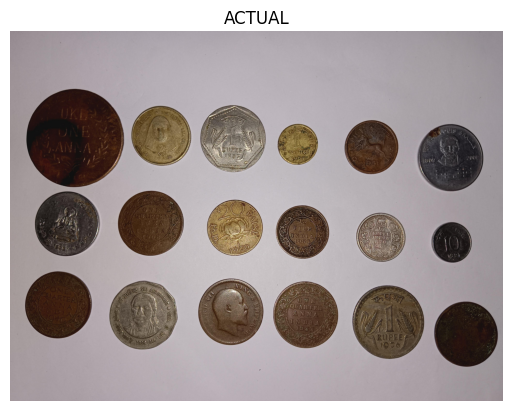

In [ ]:
#image read
path = '1.jpg'
img =  c.imread(path)#read
img =  c.cvtColor(img, c.COLOR_BGR2RGB)
p.imshow(img)
p.title("ACTUAL")
p.axis('off')
p.show()

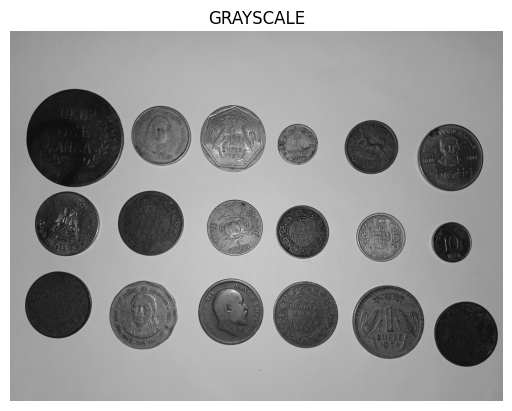

In [ ]:
#image preprocessing
gry =  c.cvtColor(img, c.COLOR_RGB2GRAY)
p.imshow(gry, cmap='gray')
p.title("GRAYSCALE")
p.axis('off')
p.show()

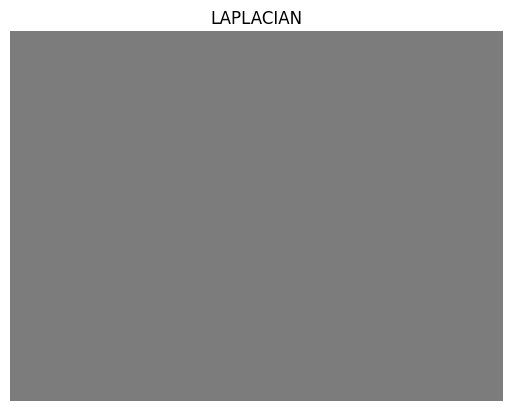

In [ ]:
#high ppass filter
Laplacian_2 = c.Laplacian(gry, c.CV_64F)
laplacian = n.clip(Laplacian_2, 0, 255).astype(n.uint8)
p.imshow(Laplacian_2, cmap='gray')
p.title("LAPLACIAN")
p.axis('off')
p.show()

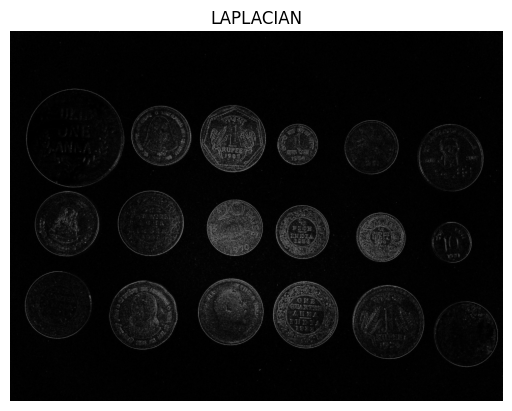

In [ ]:
laplacian_1 = c.Laplacian(gry, c.CV_64F, ksize=3)
laplacian = n.clip(laplacian_1, 0, 255).astype(n.uint8)  # Convert for display
p.imshow(laplacian, cmap='gray')
p.title("LAPLACIAN")
p.axis('off')
p.show()

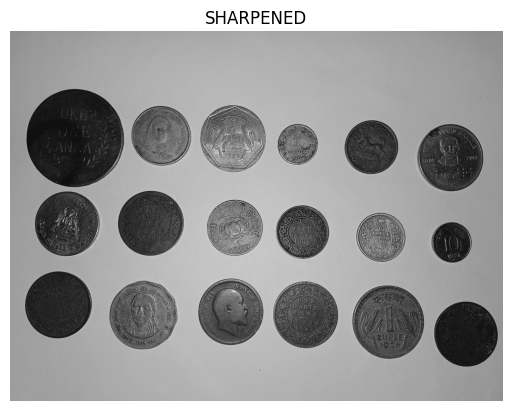

In [ ]:
#sgarpening of the image
#sharpened=original+λ×laplacian
sharpened = n.clip(gry - 0.5 * laplacian_1, 0, 255).astype(n.uint8)
p.imshow(sharpened,cmap='grey')
p.title("SHARPENED")
p.axis('off')
p.show()

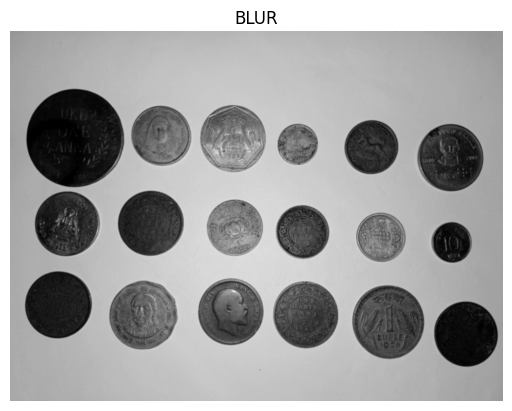

In [ ]:
#reducing noide usig gaussian
blurr =  c.GaussianBlur(sharpened, (23,23), 0)
p.imshow(blurr, cmap='gray')
p.title("BLUR")
p.axis('off')
p.show()

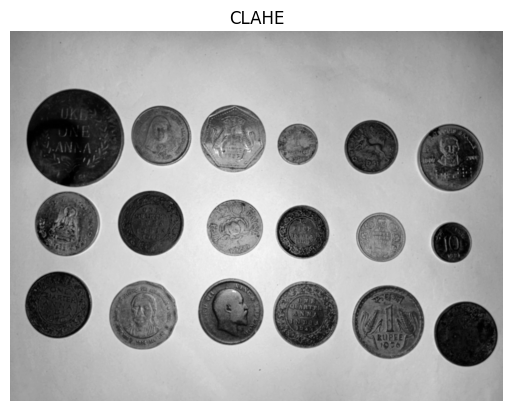

In [ ]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4, 4))
clahe_img = clahe.apply(blurr)
p.imshow(clahe_img, cmap='gray')
p.title("CLAHE")
p.axis('off')
p.show()

reT:  123.0


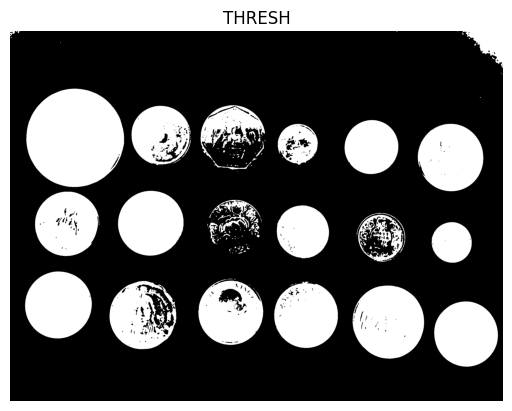

In [ ]:
ret, thresh = cv2.threshold(clahe_img, 0, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY_INV)
p.imshow(thresh, cmap='gray')
print("reT: ", ret)
p.title("THRESH")
p.axis('off')
p.show()

In [ ]:
def cannie(image):
  fig, ax = p.subplots(2, 6, figsize=(20, 8))
  for i in range(11):
      row = i // 6
      col = (i % 6)


      edges_img = cv2.Canny(image, i * 30, i * 30 + 60)
      edges_sharpened_img = cv2.Canny(n.uint8(image), i * 30, i * 30 + 60)

      ax[row, col].imshow(edges_img, cmap='gray')
      ax[row, col].set_title(f'Canny {i * 30}-{i * 30 + 60}')
      ax[row, col].axis('off')

  ax[1, 5].imshow(image, cmap='gray')
  ax[1, 5].set_title('Image')
  ax[1, 5].axis('off')

  p.tight_layout()
  p.show()

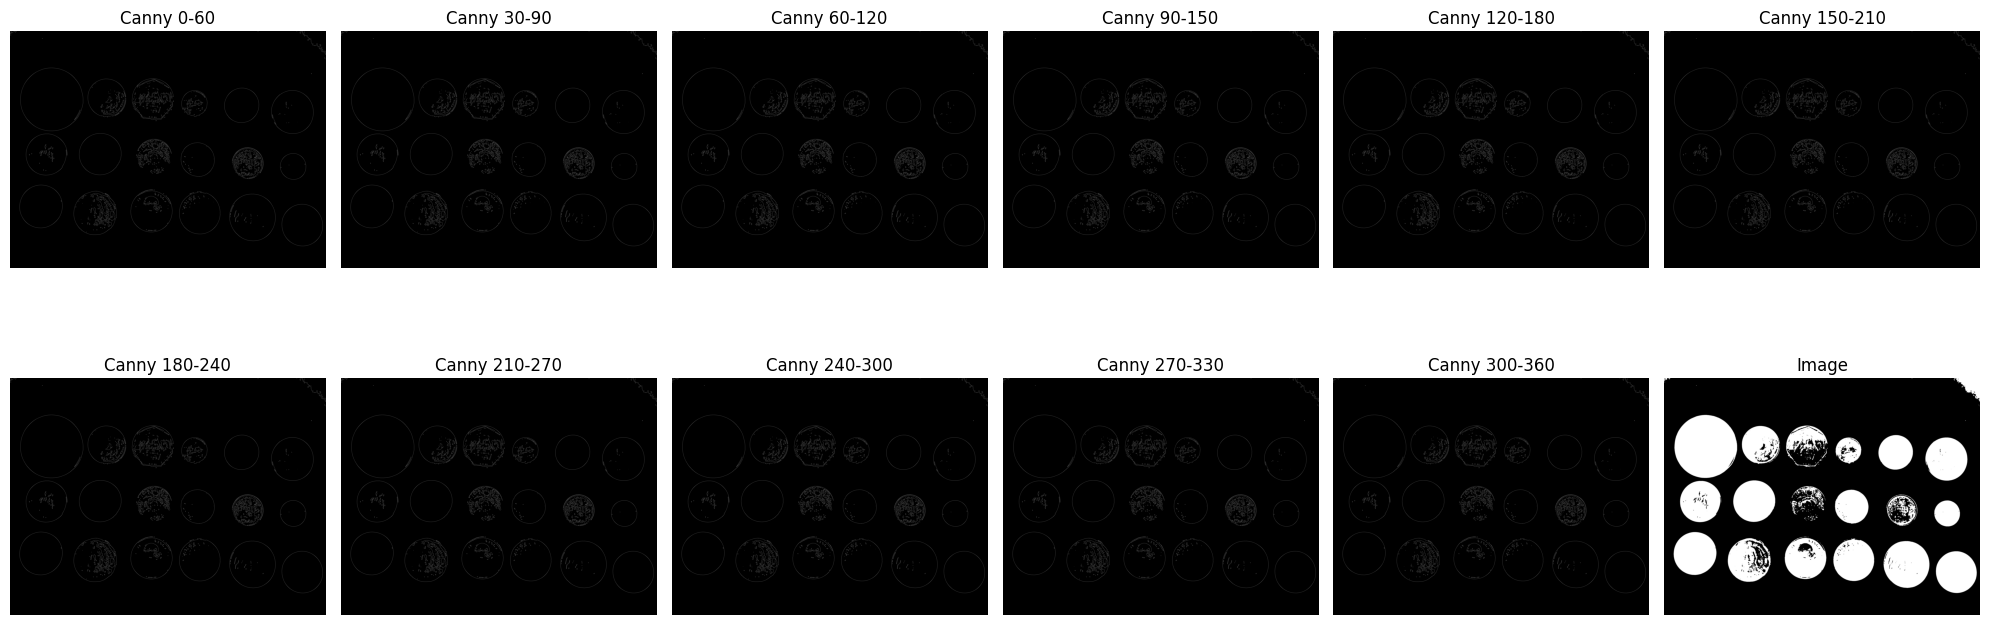

In [ ]:
cannie(thresh)

In [ ]:
def detecting_number_coins(mind, minr maxr, thres):

  circles = cv2.HoughCircles(thresh, cv2.HOUGH_GRADIENT, 1, minDist, param1=canny_higher, param2=threshold, minRadius=minRadius, maxRadius=maxRadius)
    if circles is not None:
    circles = np.uint16(np.around(circles[0]))
    for x, y, r in circles:
      cv2.circle(image, (x, y), r, (0, 0, 0), 2)
      cv2.circle(image, (x, y), 0, (0, 0, 0), 3)
  return image, len(circles) if circles is not None else 0

for mind in range(img)

In [ ]:
"""
Steps:
1. read the image
2. convert to gray scale
3. downsample
4. calhe of image brightness adjustment
5. sharpened image and lapplacian
6. gaussian blurr sharpened image
7. canny plots.
8. make the hough using the standard value found, fo this image, thn move on for asking
9. Then print the number of coins detected.

"""

In [ ]:
import cv2
import matlotlib.pyplot as plt
import numpy as np

def canny_check(image):
  fig, ax = plt.subplots(2, 6, figsize=(20, 8))
  for i in range(11):
    edges_img = cv2.Canny(image, i * 25, i * 25 + 50)
    row, col = divmod(i, 6)
    ax[row, col].imshow(edges_img, cmap='gray')
    ax[row, col].set_title(f'Canny {i * 25}-{i * 25 + 50}')
    ax[row, col].axis('off')
  ax[1, 5].imshow(image, cmap='gray')
  ax[1, 5].set_title('Original Image')
  ax[1, 5].axis('off')
  plt.tight_layout()
  plt.show()


def detect_with_Hough(self, image, canny_higher, minDist=None, threshold=30, minRadius=None, maxRadius=None):
  if not minDist: minDist = image.shape[0] // 8
  if not minRadius: minRadius = image.shape[0] // 15
  if not maxRadius: maxRadius = image.shape[0] // 8
  if not threshold: threshold = 30

  circles = cv2.HoughCircles(image, cv2.HOUGH_GRADIENT, 1, minDist, param1=canny_higher, param2=threshold, minRadius=minRadius, maxRadius=maxRadius)
  if circles is not None:
    circles = np.uint16(np.around(circles[0]))
    for x, y, r in circles:
      cv2.circle(image, (x, y), r, (0, 0, 0), 2)
      cv2.circle(image, (x, y), 0, (0, 0, 0), 3)
  return image, len(circles) if circles is not None else 0


def default(path):
  downsample_size =  529 #23*23 blurr kernel
  img=  cv2.imread(path)
  #converting from bgr to gray
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  ##downsampling
  while gray.shape[0]>downsample_size  or gray.shape[1]>downsample_size:
    gray = cv2.pyrDown(gray)

  laplacian_1 = cv2.Laplacian(gray, cv2.CV_64F, ksize=3)
  laplacian = np.clip(laplacian_1, 0, 255).astype(np.uint8)  # Convert for display

  # increase the default image brighness by 1.7 times and make the sourrounding to be redced, so o.7 times add 0
  sharpened =  cv2.addWeighted(gray.astype(np.uint8), 1.7, laplacian_1, -0.7, 0)
  sharpened =  np.clip(laplacian_1, 0, 255).astype(np.uint8) #conveting if something goes beyond the limits

  ##now need t blurr
  blurr =  cv2.GaussianBlur(sharpened, (5,5), 0)
  canny_check(blurr)
  low = int(input("Enter the low threshold: "))
  high = int(input("Enter the high threshold: "))

  minDist = 0
  threshold = 0
  minRadius = 0
  maxRadius = 0

  image, num_coins = detect_with_Hough(blurr, low, minDist, threshold, minRadius, maxRadius)
  print("Total coins: ", num_coins)


path =  '1.jpg'
default(path)


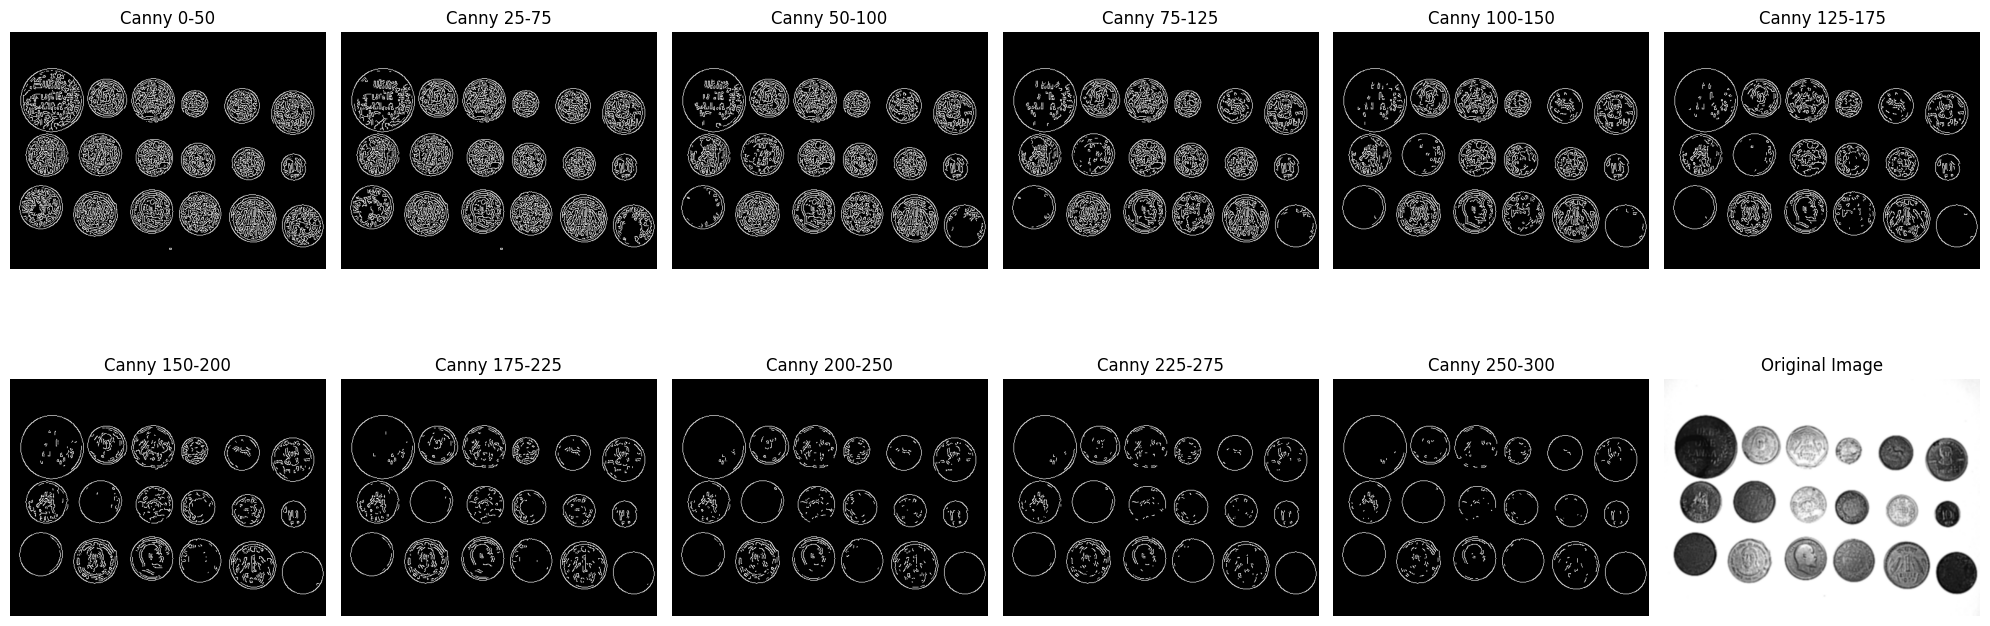

Enter the low threshold: 250
Enter the high threshold: 300


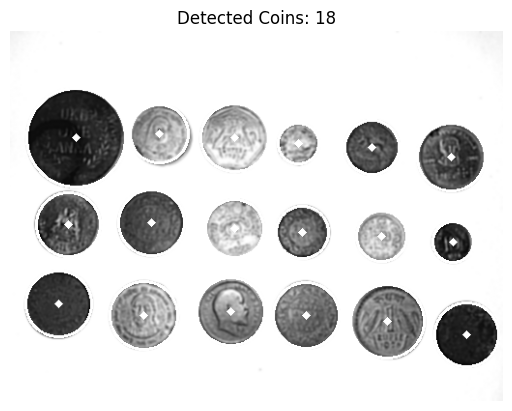

Total coins: 18


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def canny_check(image):
    # Display multiple Canny edge outputs with varying thresholds
    fig, ax = plt.subplots(2, 6, figsize=(20, 8))
    for i in range(11):
        edges_img = cv2.Canny(image, i * 25, i * 25 + 50)
        row, col = divmod(i, 6)
        ax[row, col].imshow(edges_img, cmap='gray')
        ax[row, col].set_title(f'Canny {i * 25}-{i * 25 + 50}')
        ax[row, col].axis('off')
    # Show the original image in the last subplot
    ax[1, 5].imshow(image, cmap='gray')
    ax[1, 5].set_title('Original Image')
    ax[1, 5].axis('off')
    plt.tight_layout()
    plt.show()

def detect_with_Hough(image, canny_high, minDist=None, threshold=30, minRadius=None, maxRadius=None):
    # Set default values based on image dimensions if not provided
    if minDist is None:
        minDist = image.shape[0] // 8
    if minRadius is None:
        minRadius = image.shape[0] // 15
    if maxRadius is None:
        maxRadius = image.shape[0] // 8
    if threshold is None:
        threshold = 30

    # Detect circles using the Hough Circle Transform
    circles = cv2.HoughCircles(image, cv2.HOUGH_GRADIENT, 1, minDist,
                               param1=canny_high, param2=threshold,
                               minRadius=minRadius, maxRadius=maxRadius)
    if circles is not None:
        circles = np.uint16(np.around(circles[0]))
        output = image.copy()
        # Draw the detected circles
        for x, y, r in circles:
            cv2.circle(output, (x, y), r, (0, 0, 0), 2)
            cv2.circle(output, (x, y), 2, (0, 0, 0), 3)
        return output, len(circles)
    return image, 0

def default(path):
    downsample_size = 529
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Downsample the image if it is larger than downsample_size
    while gray.shape[0] > downsample_size or gray.shape[1] > downsample_size:
        gray = cv2.pyrDown(gray)

    # Sharpening: first compute the Laplacian, then add weighted
    laplacian = cv2.Laplacian(gray, cv2.CV_64F, ksize=3)
    # Convert gray to float64 so both inputs to addWeighted have the same type
    sharpened = cv2.addWeighted(gray.astype(np.float64), 1.7, laplacian, -0.7, 0)
    sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)

    # Apply Gaussian blur to reduce noise before edge detection
    blur = cv2.GaussianBlur(sharpened, (5, 5), 0)

    # Display Canny edge results for different threshold values
    canny_check(blur)

    # Get user input for Canny thresholds (if needed)
    import time
    time.sleep(5)
    low = int(input("Enter the low threshold: "))
    high = int(input("Enter the high threshold: "))

    # Set Hough Circle parameters based on the image size
    minDist = blur.shape[0] // 8
    threshold_val = 30  # Accumulator threshold for circle detection
    minRadius = blur.shape[0] // 20
    maxRadius = blur.shape[0] // 5

    # Detect circles (coins) using HoughCircles
    result_img, num_coins = detect_with_Hough(blur, high, minDist, threshold_val, minRadius, maxRadius)

    # Display the result with detected circles and print the count
    plt.imshow(result_img, cmap='gray')
    plt.title(f'Detected Coins: {num_coins}')
    plt.axis('off')
    plt.show()
    print("Total coins:", num_coins)

# Replace '1.jpg' with the path to your image file
path = '1.jpg'
default(path)


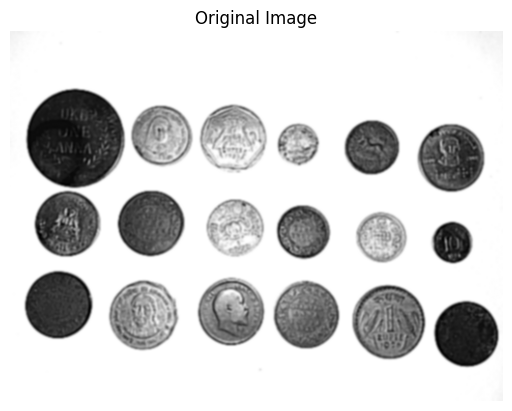

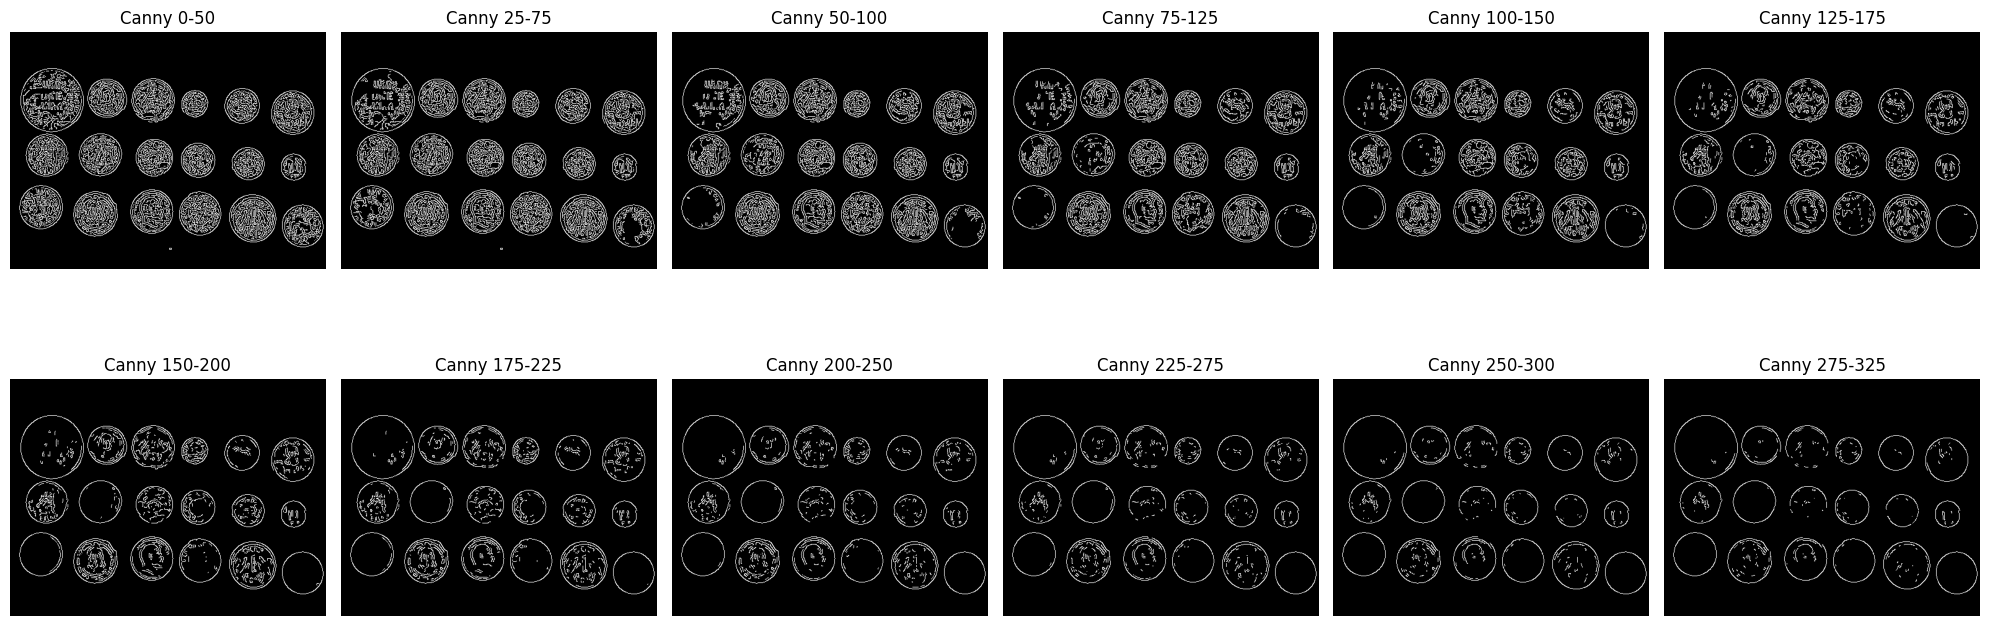

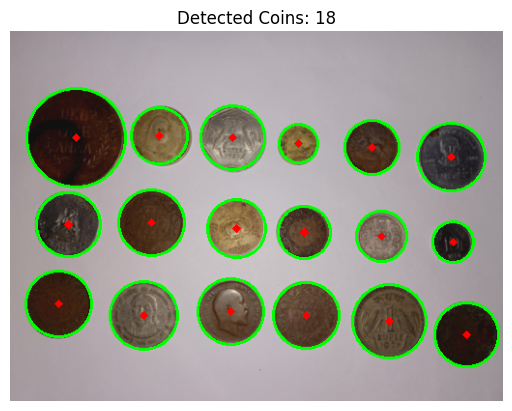

Total coins: 18


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def canny_check(image):
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    plt.show()


    fig, ax = plt.subplots(2, 6, figsize=(20, 8))
    for i in range(12):
        edges_img = cv2.Canny(image, i * 25, i * 25 + 50)
        row, col = divmod(i, 6)
        ax[row, col].imshow(edges_img, cmap='gray')
        ax[row, col].set_title(f'Canny {i * 25}-{i * 25 + 50}')
        ax[row, col].axis('off')

    plt.tight_layout()
    plt.show()

def detect_with_Hough(gray_image, color_image, canny_high, minDist=None, threshold=30, minRadius=None, maxRadius=None):
    if minDist is None:
        minDist = gray_image.shape[0] // 8
    if minRadius is None:
        minRadius = gray_image.shape[0] // 15
    if maxRadius is None:
        maxRadius = gray_image.shape[0] // 8
    if threshold is None:
        threshold = 30

    # Detect circles on the grayscale image
    circles = cv2.HoughCircles(gray_image, cv2.HOUGH_GRADIENT, 1, minDist,
                               param1=canny_high, param2=threshold,
                               minRadius=minRadius, maxRadius=maxRadius)
    if circles is not None:
        circles = np.uint16(np.around(circles[0]))
        output = color_image.copy()  # Draw on the color image
        for x, y, r in circles:
            cv2.circle(output, (x, y), r, (0, 255, 0), 2)  # Green circle (BGR format)
            cv2.circle(output, (x, y), 2, (0, 0, 255), 3)   # Red center dot
        return output, len(circles)
    return color_image, 0

def default(path):
    downsample_size = 529
    img = cv2.imread(path)

    # Downsample the COLOR image
    color_downsampled = img.copy()
    while color_downsampled.shape[0] > downsample_size or color_downsampled.shape[1] > downsample_size:
        color_downsampled = cv2.pyrDown(color_downsampled)

    # Convert to grayscale after downsampling
    gray = cv2.cvtColor(color_downsampled, cv2.COLOR_BGR2GRAY)


    # Sharpening steps
    laplacian = cv2.Laplacian(gray, cv2.CV_64F, ksize=3)
    sharpened = cv2.addWeighted(gray.astype(np.float64), 1.7, laplacian, -0.7, 0)
    sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)

    # Blur
    blur = cv2.GaussianBlur(sharpened, (5, 5), 0)

    # Show Canny edges for threshold selection
    canny_check(blur)

    # Get user input for thresholds
    import time
    time.sleep(5)
    low = 250#int(input("Enter the low threshold: "))
    high = 300

    # Set Hough parameters
    minDist = blur.shape[0] // 8
    threshold_val = 30
    minRadius = blur.shape[0] // 20
    maxRadius = blur.shape[0] // 5

    # Detect circles and draw on the COLOR image
    result_img, num_coins = detect_with_Hough(blur, color_downsampled, high, minDist, threshold_val, minRadius, maxRadius)

    # Convert BGR to RGB for correct display in matplotlib
    result_img_rgb = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)
    plt.imshow(result_img_rgb)
    plt.title(f'Detected Coins: {num_coins}')
    plt.axis('off')
    plt.show()
    print("Total coins:", num_coins)

# Replace '1.jpg' with your image path
path = '1.jpg'
default(path)